In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

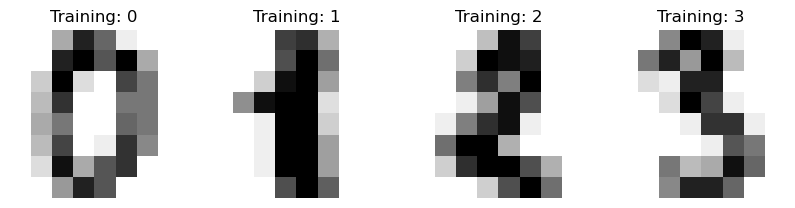

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

knn.fit(X_train, y_train)# Predict on dataset which model has not seen before
result=knn.predict(X_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

# Predict the value of the digit on the test subset
predicted = knn.predict(X_test)

Accuracy : 0.9532814238042269
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.96      0.97      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.89      0.89        91
           4       1.00      0.93      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.94      0.91      0.92        88
           9       0.89      0.92      0.91        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



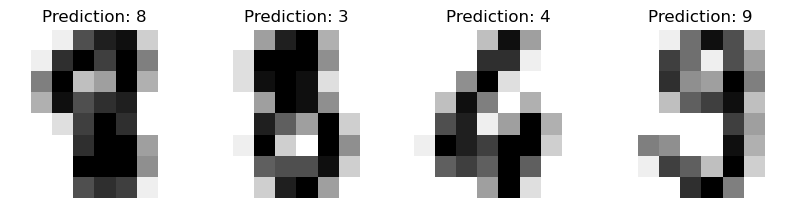

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [5]:
print(
    f"Classification report for classifier {knn}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier KNeighborsClassifier(n_neighbors=6, weights='distance'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.96      0.97      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.89      0.89        91
           4       1.00      0.93      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.94      0.91      0.92        88
           9       0.89      0.92      0.91        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899




Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  0 81  0  2  0  3  3  2]
 [ 0  0  0  0 86  0  0  1  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  4  1  1  0  0  0  1 80  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


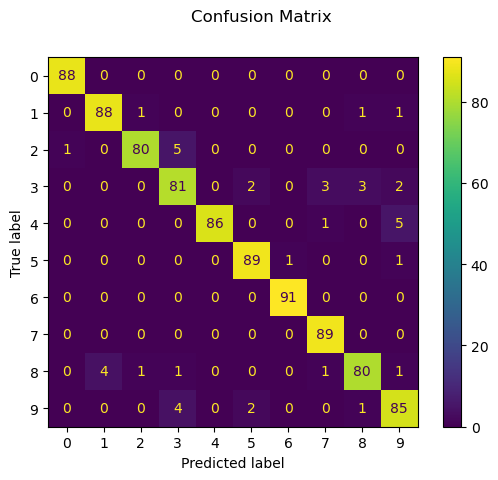

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.96      0.97      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.89      0.89        91
           4       1.00      0.93      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.94      0.91      0.92        88
           9       0.89      0.92      0.91        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899


